# Data Exploration of  the Tree census dataset along with data cleaning.

## Link to dataset for gaining insights about the data,column names and their meaning
## https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

In [1]:
## importing libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None) ## To show all the columns as by default it is limited.
# pd.set_option('display.max_rows', None)     To show all the columns as by default it is limited.

In [2]:
## Reading th data into pandas.
tree_cen = pd.read_csv('C:\\Users\\vishal rana\\Downloads\\2015_Street_Tree_Census_-_Tree_Data.csv')
tree_cen

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [3]:
tree_cen.columns   ## Checking out all the columns and looking for only those that are necesssary.

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [4]:
## Now after that we have choosen the important attributes, we make a dataframe.
tree_subset= tree_cen[[ 'tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems','root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]

In [5]:
tree_subset ## this the dataset we will work with.

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No


## Exploring the Data

In [6]:
## First we look for the null values.
tree_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
user_type         0
problems      31664
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

In [7]:
tree_subset[tree_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No


### We observe that for a tree for which the status is either Dead or stump, every record is NaN or filled as NO. So we will have to deal with them in DATA CLEANING process.

In [8]:
tree_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tree_id     683788 non-null  int64 
 1   tree_dbh    683788 non-null  int64 
 2   stump_diam  683788 non-null  int64 
 3   curb_loc    683788 non-null  object
 4   status      683788 non-null  object
 5   health      652172 non-null  object
 6   spc_latin   652169 non-null  object
 7   spc_common  652169 non-null  object
 8   steward     652173 non-null  object
 9   guards      652172 non-null  object
 10  sidewalk    652172 non-null  object
 11  user_type   683788 non-null  object
 12  problems    652124 non-null  object
 13  root_grate  683788 non-null  object
 14  root_other  683788 non-null  object
 15  trunk_wire  683788 non-null  object
 16  trnk_light  683788 non-null  object
 17  trnk_other  683788 non-null  object
 18  brch_light  683788 non-null  object
 19  brch_shoe   683788 non-

In [9]:
tree_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


### Here we observe that tree_dbh which is diameter of tree has a maximum of 450 inches. This means that a tree has 11 metres diameter which is not plausible. Further exploration with histograms to confirm it.

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>, <AxesSubplot:>]],
      dtype=object)

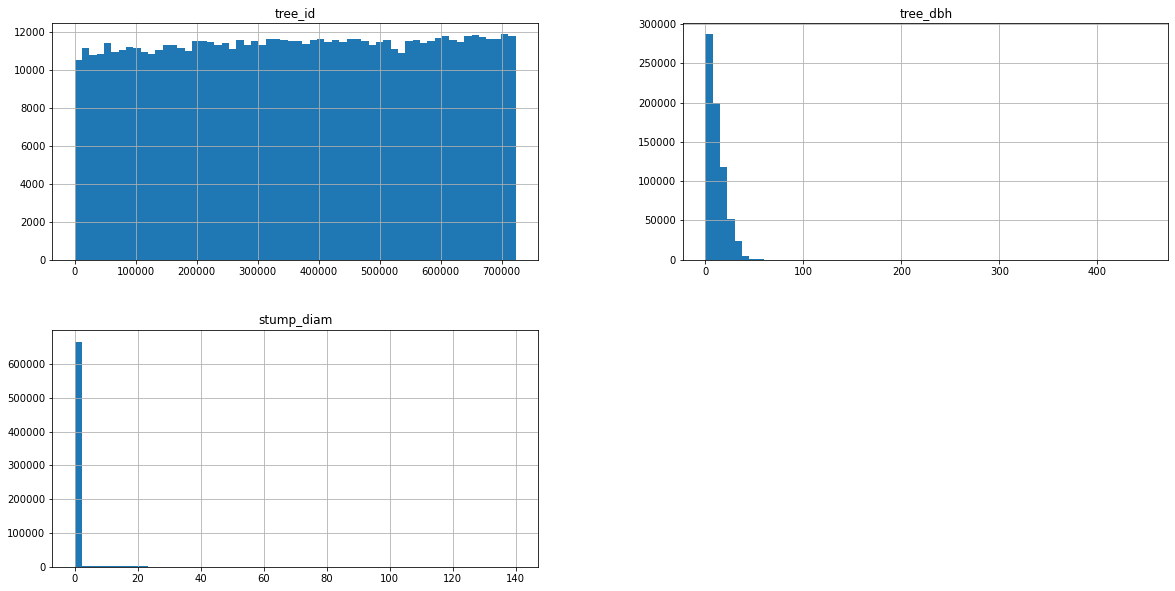

In [10]:
tree_subset.hist(bins= 60,figsize=(20,10))

In [11]:
Outlier_trees= tree_subset[tree_subset['tree_dbh']>50]
Outlier_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,Volunteer,Stones,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,white oak,None,None,NoDamage,Volunteer,BranchLights,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No


<AxesSubplot:xlabel='tree_id', ylabel='tree_dbh'>

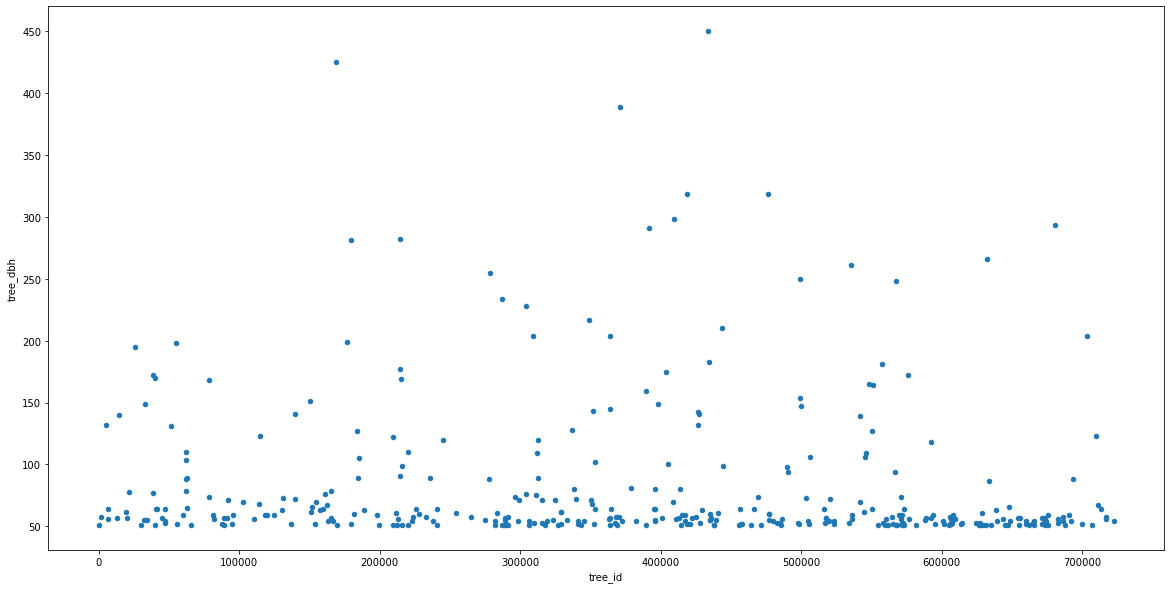

In [12]:
Outlier_trees[['tree_id','tree_dbh']].plot(kind= 'scatter',x= 'tree_id',y= 'tree_dbh',figsize=(20,10))

### we observe that there are number of outliers for the diameter of the tree.These could have been entered wrong or replaced with some other value that should have been added. 

<AxesSubplot:xlabel='tree_id', ylabel='stump_diam'>

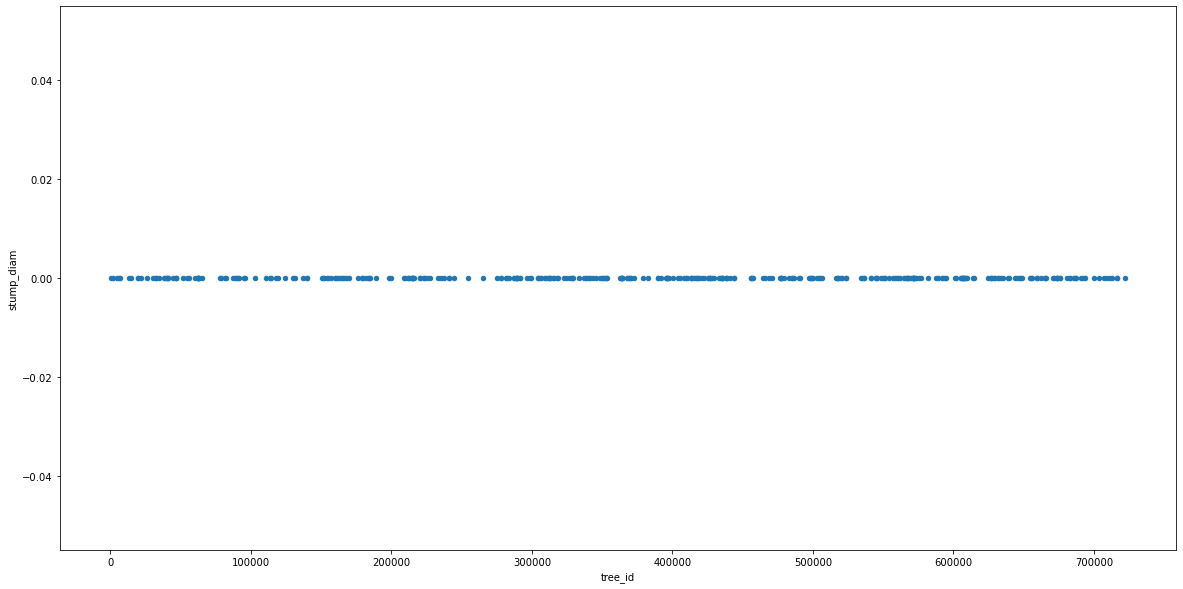

In [13]:
Outlier_trees[['tree_id','stump_diam']].plot(kind= 'scatter',x= 'tree_id',y= 'stump_diam',figsize=(20,10))

In [14]:
## Tyoe of species of the trees 
tree_subset['spc_latin'].value_counts()

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 132, dtype: int64

<AxesSubplot:>

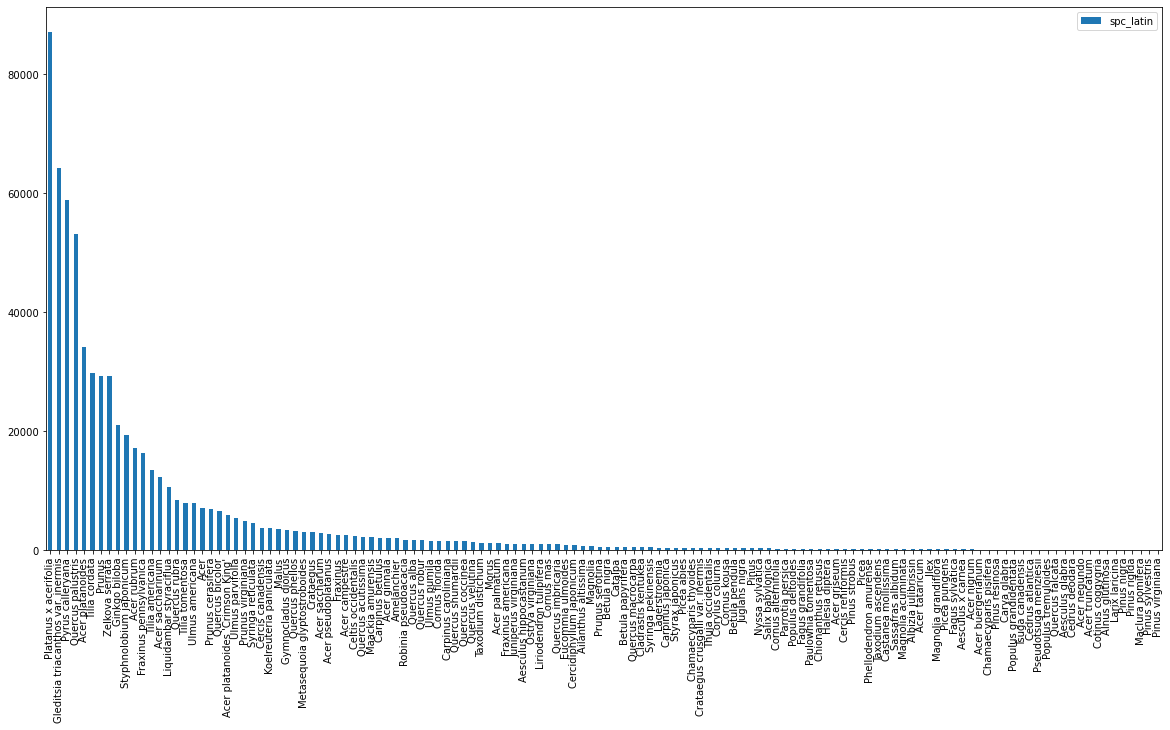

In [15]:
pd.DataFrame(tree_subset['spc_latin'].value_counts()).plot(kind= 'bar',figsize= (20,10))

In [16]:
tree_subset['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [17]:
stump=  tree_subset[tree_subset['status']=='Stump']
stump

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No


In [18]:
Dead=  tree_subset[tree_subset['status']=='Dead']
Dead

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No


In [19]:
tree_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
user_type         0
problems      31664
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

#### So we had already observed that for status either dead or stump we had NaN values.
#### Confirming it by adding the values of Stump and dead trees =>17654 + 13961 = 31615.(One less than original 31616)

In [20]:
tree_subset.columns

Index(['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health',
       'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type',
       'problems', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light',
       'trnk_other', 'brch_light', 'brch_shoe', 'brch_other'],
      dtype='object')

In [21]:
tree_df= tree_subset[['root_grate', 'root_other', 'trunk_wire', 'trnk_light',
       'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]
tree_df

,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No


In [22]:
tree_df.apply(pd.Series.value_counts)

,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,680252,653466,670514,682757,651215,621423,683377,659433
Yes,3536,30322,13274,1031,32573,62365,411,24355


### After exploring the data, we found there are outliers,Nan values present in the dataset. Now we will clean the data to get our desired Dataset

### Now for the stumps that have  Nan records we will replace it with Not applicable.
### **tree_subset.fill na('Not applicable ') can be used but there are values of nan for stumps and dead is not equal to Total Nan values. So we want to replace it specifically where there is stump or dead.

In [23]:
stu_dd = ((tree_subset['status']== 'Dead') | (tree_subset['status']== 'Stump')) ## using or(|) operator

In [24]:
tree_subset.loc[stu_dd]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No


In [25]:
tree_subset.loc[stu_dd]= tree_subset.loc[stu_dd].fillna('Not Applicable')

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [26]:
tree_subset.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
spc_common     5
steward        0
guards         1
sidewalk       1
user_type      0
problems      49
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

In [27]:
tree_subset[tree_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,green ash,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No


In [28]:
tree_subset['health'].value_counts()

Good              528850
Fair               96504
Not Applicable     31615
Poor               26818
Name: health, dtype: int64

In [29]:
## Replacing the nan value in health with most occuring value Good
tree_subset['health'].fillna('Good', inplace = True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Similarly we will replace Nan Values for respective records with  the most occuring term.Also given the size of the dataset, if will not reflect much on the dymanics of the dataset.

In [30]:
tree_subset[tree_subset['sidewalk'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
346299,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NaN,TreesCount Staff,None,No,No,No,No,No,No,No,No


In [31]:
tree_subset[tree_subset['spc_latin'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
356613,562532,4,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No
427541,630814,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
431417,651014,40,0,OnCurb,Alive,Good,NaN,NaN,None,None,Damage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No
608632,47941,5,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No
656960,150745,3,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No


In [32]:
tree_subset[tree_subset['problems'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
120289,332668,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
121488,332669,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
121685,332670,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
133470,332693,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
133812,332692,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,None,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
134820,332694,28,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
144137,332947,3,0,OnCurb,Alive,Good,Ginkgo biloba,ginkgo,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
145324,332543,9,0,OnCurb,Alive,Good,Prunus,cherry,None,None,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
145337,332541,8,0,OnCurb,Alive,Good,Prunus,cherry,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No
146314,332542,8,0,OnCurb,Alive,Good,Prunus,cherry,1or2,None,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No


In [33]:
tree_subset['sidewalk'].fillna('NoDamage',inplace = True)
tree_subset['spc_latin'].fillna('No Observation', inplace= True)
tree_subset['problems'].fillna('Good',inplace =True)
tree_subset['spc_common'].fillna('London planetree',inplace = True)
tree_subset['guards'].fillna('None',inplace = True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
tree_subset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
user_type     0
problems      0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

In [35]:
Outlier_trees= tree_subset[(tree_subset['tree_dbh']>60) | (tree_subset['stump_diam']>60)]

Outlier_trees
                                                           

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,NYC Parks Staff,Not Applicable,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No


### Now we will replace these outliers with the average of the stump diametre or tree diametre.First we will remove all the outliers from the original dataset, then get the average and replace it in the outliers.

In [36]:
tree_subset= tree_subset[(tree_subset['tree_dbh']<=60) & (tree_subset['stump_diam']<=60)]
tree_subset ## this is the dataset without outliers

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No


In [37]:
tree_subset_Alive = tree_subset[tree_subset['status']== 'Alive']
tree_subset_stump_dead= tree_subset[(tree_subset['status']== 'stump') | (tree_subset['status']== 'Dead')]

In [38]:
tree_subset_Alive.groupby('spc_latin').mean()

,tree_id,tree_dbh,stump_diam
spc_latin,,,
Acer,473760.032486,11.675424,0.0
Acer buergerianum,395036.818182,8.090909,0.0
Acer campestre,383928.187917,7.103962,0.0
Acer ginnala,370801.015129,7.869204,0.0
Acer griseum,347632.222727,3.509091,0.0
...,...,...,...
Tsuga canadensis,268551.181818,5.193182,0.0
Ulmus americana,308764.589313,11.933768,0.0
Ulmus parvifolia,303404.453219,7.396894,0.0


In [39]:
tree_subset_Alive.groupby('spc_latin')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2549.0,7.103962,4.293100,0.0,4.0,6.0,9.0,35.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,88.0,5.193182,3.959153,0.0,2.0,3.5,7.0,21.0
Ulmus americana,7972.0,11.933768,9.374470,0.0,4.0,9.0,17.0,58.0
Ulmus parvifolia,5344.0,7.396894,5.669532,0.0,3.0,5.0,10.0,53.0


#### we observe that we have min as 0 which is not possible. So we are going create a bracket of 25% and 75%. For outliers we will assign a value accordingly.


In [40]:
bracket=  tree_subset_Alive.groupby('spc_latin')['tree_dbh'].describe().reset_index()[['spc_latin','25%','75%']]
bracket

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


### Now we merege this dataframe with the tree_subset_alive

In [41]:
 
tree_subset_Alive= tree_subset_Alive.merge(bracket,on='spc_latin',how='left')

In [42]:
tree_subset_Alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,5.0,14.0


### Now here to deal with outliers we are putting a condition that values less than 25% and values greater than 75% will be excluded.

In [43]:
stat= tree_subset_Alive['tree_dbh']< tree_subset_Alive['25%']
tree_subset_Alive.loc[stat,'tree_dbh']= tree_subset_Alive['25%']

stat= tree_subset_Alive['tree_dbh']> tree_subset_Alive['75%']
tree_subset_Alive.loc[stat,'tree_dbh']= tree_subset_Alive['75%']

In [44]:
tree_subset_Alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,5.0,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,12.0,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,24.0,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,5.0,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12.0,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9.0,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,5.0,14.0


In [45]:
tree_subset_Alive.drop(['25%','75%'],axis= 1,inplace = True) ## Dropping the 25% AND 75% column.

# This is our cleaned Dataset which can be used for further Analysis.

In [46]:
tree_subset_Alive ## this is our cleaned dataset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,5.0,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
1,200540,21.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No
2,204026,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
3,204337,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
4,189565,12.0,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,24.0,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
652019,183795,5.0,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No
652020,166161,12.0,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No
652021,184028,9.0,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No
